### Functions

A function is a mapping of values from. In this block we will mostly focus on functions that do mapping from $R$ to $R$. We can write $R \rightarrow R$ in this case or symply imply it. If for every value x of the function we plot a point for function's value we get the plot if the function. Here are some samples that should be familiar.

In [0]:
print(jupyter.available_kernels())


p0=plot(x^2,(-4,4), axes="true");
p1=plot(x^3,(-4,4), axes="true");
p2=plot(x^4,(-4,4), axes="true");
show(p0+p1+p2)

p0=plot(x*sin(x),(-3*pi,3*pi), axes="true");
p1=plot(sin(x*x),(-3*pi,3*pi), color='purple', axes="true");
p2=plot(x*sin(x*x),(-3*pi,3*pi), color='green', axes="true");
show(p0+p1+p2)

Sage also alows for interactive graphs.

In [0]:
@interact
def _(a=slider(1, 3), p=slider(0,2*pi),f=slider(1,3)):
    show(plot(a*sin(f*x+p),(x, 0, 2*pi)))

### Domain
Domain of a function is the set of arguments for which the function is defined. In this case this it's simply a subset of $R$. For the the function defined below the domains are commented.

In [0]:
plot(sqrt(x),(-3,3)) # Defined over [0,inf)
plot(1/x,(-1,1), ymin=-30, ymax=30) # Defined over (-inf,0) U (0,inf)

### Limits
Limits play a central role in calculus. Main terms in calculus like the differentrial, integral are defined using the limit. A limit is the value that a function approaches as the input approaches some value.

In symbols, $$\lim_{x\to a} f(x)$$

If the function is continous at the point in question, then finding the limit is easy. Let's attempt to solve the folowing limits.

In [0]:
limit((x^2-1)/(x-1), x=1)
limit((x^2-2*x-8)/(x-4), x=4)
limit((1-cos(x)^2)/sin(x), x=0)

Limits to infinity can be used to identify horizontal or slanted asymptotes. Infinite limits at certain values of the function can be used to identify vertical asymptotes.

In [0]:
# For example
# 1/0
limit(1/x, x=0)

### Derivatives

A deriviative is a measurment of change. Let's look at the change of a function with respect to the change of the input arround a certain point. The ratio is defined as:

$ \frac{f(x+t)-f(x)}{t} $

We can take a function to analyze arround the point 0.5:

$ f(x)=1 + x + x^2 $

2.00000000000000
1.50000000000000
1.33333333333333
1.25000000000000
1.20000000000000


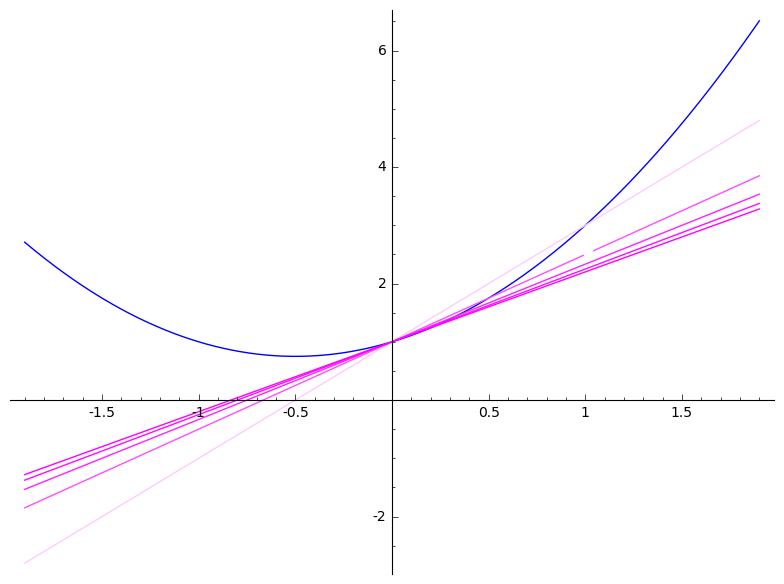

In [6]:
var('x','m','t','s');
rng = 1.9;
n = 5;
f(x) = 1 + x + x^2;
s=0;
fPlot = plot(f(x), (x, s-rng, s+rng));
plots = list(var('p_%d' % i) for i in range(n));
for i in range(n) :
    t = 1.0/(i+1);
    m = (f(s+t) - f(s)) / (t);
    b = f(s) - m * s;
    print(m);
    plots[i]=plot(m*x + b, (x, s-rng, s+rng), color=(1, 1/(i+1) - 0.2 , 1));
show(fPlot+sum(plots));

As we are getting closer and closer to the point, the line is getting closer to the tanget of the function. We can use the followinf limit to define the derivative.

$$ f'(x)=\lim_{t\to 0} \frac{f(x+t)-f(x)}{t} $$

The derivative tells us, what is the rate of change around a certain value of the function. Geometrically it's the slope of the function's tangent. There are multiple notations. The dot notation dates back to Newton. The Leibnitz notation is a bit more verbose, but more usefull when dealing with multiple variables (which we will not in this course).

In [0]:
var('t')
der_l(x)=limit((f(x+t)-f(x))/t, t=0);
der_d(x)=diff(f(x),(x));
print(der_l(s));
print(der_d(s));
print(der_l);
print(der_d);

The derivative of a function $f'(x)$ is a function of $x$. We can also take the second derivative $f''(x)=(f'(x))'$, which is again a function of $x$. Taking the derivative of the second derivative will give us the third derivative and you can guess where this is going.

As we can see, the derivative of function can be calculated for the entire domain of a function. This is called a **indefinite derivative**. If a function $f(x)$ is the derivative of a function $F(x)$, we call $F(x)$ **antiderivative** of $f(x)$.

The derivatives of certain function are known and we can apply these rules to find the derivatives of other functions. Consider $u$ and $v$ to be functions of $x$.

Basic ones:

$x'= 1$

$c'= 0$

$cx^n = nx^{n-1}$

$(u(x)+v(x))' = u(x)'+ v(x)'$


Product rule:

$ u v = u'v + v'u $

Quotient rule:

$\frac{u}{v}= \frac{u'*v - v'*u} {v^2}$

Chain rule:

$f(g(x))'= f'(g(x))g'(x)$

Exponential rule:

$ {e^x}'=e^x $

Trigonometric

$sin(x)'=cos(x)$

$cos(x)'=-sin(x)$

In [11]:
Tylor series

SyntaxError: invalid syntax (<ipython-input-11-789890578771>, line 1)

### Integrals

Now let's take another problem to analyze. What is the surface under a function.

We can break down the function in to smaller regions and approximate the surface underneath them with an rectangle and sum those rectangles together. This is called a Riemann sum.

$\sum f(x)\Delta x $

/opt/sagemath-8.2/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: use lower-case piecewise instead
See http://trac.sagemath.org/14801 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


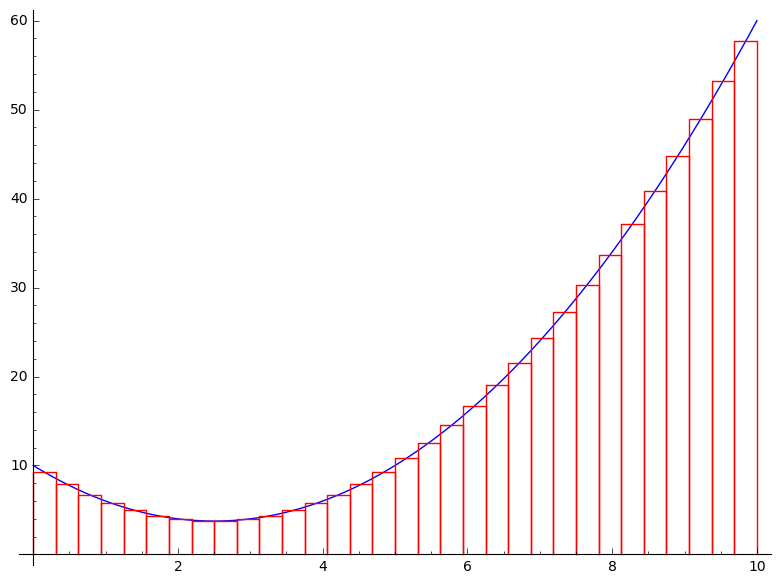

183.251953125000

In [9]:
f(x) = x^2-5*x+10
f = Piecewise([[(0,10), f]])
g = f.riemann_sum(32, mode="midpoint")
F = f.plot(color="blue")
R = add([line([[a,0],[a,f(x=a)],[b,f(x=b)],[b,0]], color="red") for (a,b), f in g.list()])
show(F+R)
g.integral(definite=True).numerical_approx()


If we take this process and use smaller and smaller $ \Delta x $ we get to the definition of an integral.

$$ \int_{a}^{b}  f(x) dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x)\Delta x $$

Let's jump to an example an try to solve the integral:

$$ \int_{0}^{1} x^2 dx $$

### Fundamental Theorem of Caculus
The place where all this ties together is the Fundamental Theorem of Calculus, which tells us the integration is the inverse opertaion of differentitation.

If $F(x)$ is the antiderivative of a function $f(x)$, continuos over the region $[a,b]$, then

$$ \int_{a}^{b}  f(x) dx = F(b) - F(a) $$

In [10]:
f(x) = x^2-5*x+10
F(x) = integral(f(x),x)
print(F(x))
area = F(10)-F(0)
area.numerical_approx()

1/3*x^3 - 5/2*x^2 + 10*x


183.333333333333

Sometimes algebric itegration is not possible or very difficult to calcluate. We can then reffer to the riemann sum to approximate the value. A better approximation would be to use the trapezoidal rule.

In [0]:
f = Piecewise([[(0,10), f]])
g = f.trapezoid(12)
F = f.plot(color="blue")
R = add([line([[a,0],[a,f(x=a)],[b,f(x=b)],[b,0]], color="red") for (a,b), f in g.list()])
show(F+R)
g.integral(definite=True).numerical_approx()